<a href="https://colab.research.google.com/github/juliakahan/TechChallenge/blob/main/MLtask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A company selling luxury products prepares a marketing campaign to promote their brand new model of a golden watch.
While selling the previous model they collected the following data about the customers.
**Age** - the age of customer
**Salary** - the estimated customer's salary value
**Purchased** - information if given customer purchased the product or not, **1** - yes, **0** - no

Deliver a solution in Python which leverages Machine Learning and the available data to help the company predict 
**which customers may be willing to buy their new watch**, so that they can properly target their marketing efforts.
The solution should answer the question if customer in given age who earns given salary **will buy the product or not**.



In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import classification_report


In [3]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('/content/DATA/Customers.csv')
print(df) 

     Age  Salary  Purchased
0     27   57000          0
1     19   76000          0
2     27   58000          0
3     27   84000          0
4     32  150000          1
..   ...     ...        ...
375   46   41000          1
376   51   23000          1
377   50   20000          1
378   36   33000          0
379   49   36000          1

[380 rows x 3 columns]


In [5]:
print("Number of instances: ", df.shape[0])

Number of instances:  380


In [6]:
df.isnull().sum()

Age          0
Salary       0
Purchased    0
dtype: int64

In [7]:
X_customers = df[["Age", "Salary"]]
y_customers = df["Purchased"]

In [8]:
X_customers

,Age,Salary
0,27,57000
1,19,76000
2,27,58000
3,27,84000
4,32,150000
...,...,...
375,46,41000
376,51,23000
377,50,20000
378,36,33000


Mapping binary values to the suitable answer type.

In [9]:
y_customers = y_customers.map({0:'no',1:'yes'})
y_customers

0       no
1       no
2       no
3       no
4      yes
      ... 
375    yes
376    yes
377    yes
378     no
379    yes
Name: Purchased, Length: 380, dtype: object

Random Forest

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_customers, y_customers, test_size=0.2, random_state=0)

In [11]:
param_dist = {'n_estimators': randint(50,250),
              'max_depth': randint(1,10)}

In [12]:
tree_clf = RandomForestClassifier()

In [13]:
rand_search = RandomizedSearchCV(tree_clf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f67fb555a60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f67fb555700>})

In [14]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 2, 'n_estimators': 221}


In [15]:
y_pred_rf = best_rf.predict(X_test)

In [16]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest accuracy:", accuracy_rf)

Random Forest accuracy: 0.9210526315789473


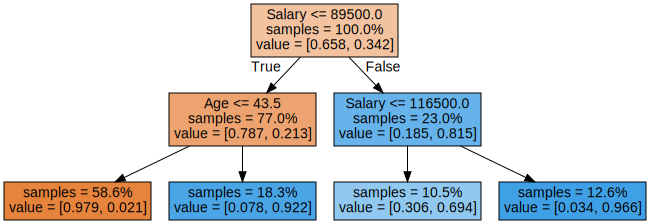

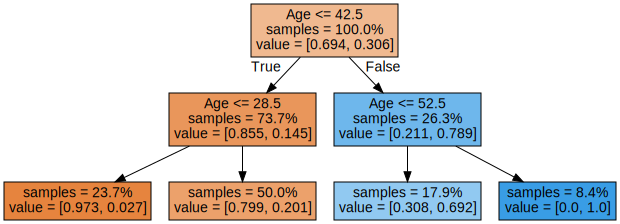

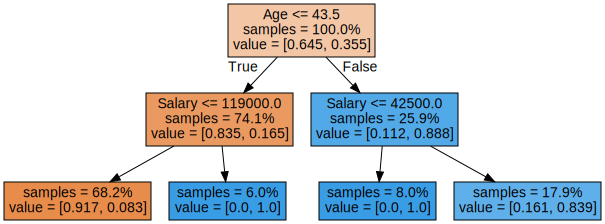

In [17]:
for i in range(3):
  tree = best_rf.estimators_[i]
  dot_data = export_graphviz(tree,
                              feature_names=X_train.columns,  
                              filled=True,  
                              max_depth=2, 
                              impurity=False, 
                              proportion=True)
  graph = graphviz.Source(dot_data)
  display(graph)

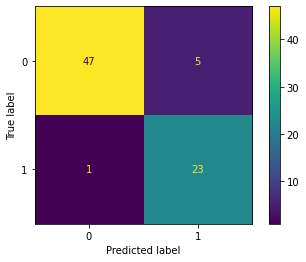

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot();

Logistic Regression

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred_lr = lr.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

          no       0.68      1.00      0.81        52
         yes       0.00      0.00      0.00        24

    accuracy                           0.68        76
   macro avg       0.34      0.50      0.41        76
weighted avg       0.47      0.68      0.56        76



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

          no       0.98      0.90      0.94        52
         yes       0.82      0.96      0.88        24

    accuracy                           0.92        76
   macro avg       0.90      0.93      0.91        76
weighted avg       0.93      0.92      0.92        76



Ensemble with Random Forest as base classifier


In [23]:
ensemble = VotingClassifier(estimators=[('rf', best_rf)], voting='hard')
ensemble.fit(X_train, y_train)
y_pred_en = ensemble.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred_en))


              precision    recall  f1-score   support

          no       0.98      0.90      0.94        52
         yes       0.82      0.96      0.88        24

    accuracy                           0.92        76
   macro avg       0.90      0.93      0.91        76
weighted avg       0.93      0.92      0.92        76



Ensemble seem to be a probably best method from the above ones.

In [25]:
def user_input():
  while True:
    try:
      age = input("Provide the customer's  age (numeric value): ")
      salary = input("Provide the customer's salary(numeric value): ")
      age = int(age)
      salary = int(salary)
      return age, salary
    except ValueError:
      print("One or more values given are nor numerical. Please, provide the numerical value as mentioned.")

In [26]:
def predict__customer_decision(model):
  age, salary = user_input()
  ds = pd.DataFrame({'Age' : [age], 'Salary' : [salary]})
  if model.predict(ds)[0] == 'yes':
    return "The customer of the given age and salary will buy the watch."
  else:
    return "The customer of the given age and salary will not buy the watch."


In [27]:
predict__customer_decision(ensemble)

Provide the customer's  age (numeric value): 20
Provide the customer's salary(numeric value): 5000


'The customer of the given age and salary will not buy the watch.'

In [28]:
df["Salary"].min()

15000

In [29]:
df["Age"].min()

18